In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Load datasets
btc_address = 'BTC.csv'
btc = pd.read_csv(btc_address)
btc['date'] = pd.to_datetime(btc['date'])
btc['year'] = btc['date'].dt.year.astype(int)

eth_address = 'ETH.csv'
eth = pd.read_csv(eth_address)
eth['date'] = pd.to_datetime(eth['date'])
eth['year'] = eth['date'].dt.year.astype(int)

In [3]:
#Merge the two loaded datasets
btc_eth = btc.merge(eth, left_on='date', right_on='date')

In [4]:
btc_eth.head()

,ticker_x,date,open_x,high_x,low_x,close_x,year_x,ticker_y,open_y,high_y,low_y,close_y,year_y
0,BTC,2015-08-07,278.00,279.60,274.28,277.89,2015,ETH,3.0,3.0,3.0000,3.00,2015
1,BTC,2015-08-08,277.89,278.92,257.42,258.60,2015,ETH,3.0,3.0,1.2000,1.20,2015
2,BTC,2015-08-09,258.60,266.75,258.56,263.87,2015,ETH,1.2,1.2,1.2000,1.20,2015
3,BTC,2015-08-10,263.87,266.63,260.52,263.30,2015,ETH,1.2,1.2,1.2000,1.20,2015
4,BTC,2015-08-11,263.30,269.90,261.44,269.03,2015,ETH,1.2,1.2,0.6504,0.99,2015


In [5]:
#Select relevant columns
btc_eth_ = btc_eth[['date','high_x', 'low_x', 'close_x','high_y', 'low_y', 'close_y']]
btc_eth_sub = btc_eth_.rename(columns={'high_x': 'high_btc','low_x': 'low_btc', 'close_x': 'close_btc','high_y': 'high_eth','low_y': 'low_eth', 'close_y': 'close_eth'})
btc_eth_sub.head()

,date,high_btc,low_btc,close_btc,high_eth,low_eth,close_eth
0,2015-08-07,279.60,274.28,277.89,3.0,3.0000,3.00
1,2015-08-08,278.92,257.42,258.60,3.0,1.2000,1.20
2,2015-08-09,266.75,258.56,263.87,1.2,1.2000,1.20
3,2015-08-10,266.63,260.52,263.30,1.2,1.2000,1.20
4,2015-08-11,269.90,261.44,269.03,1.2,0.6504,0.99


In [6]:
btc_eth_sub.corr(numeric_only=True)

,high_btc,low_btc,close_btc,high_eth,low_eth,close_eth
high_btc,1.000000,0.998883,0.999451,0.937288,0.934693,0.936990
low_btc,0.998883,1.000000,0.999374,0.938838,0.938427,0.939669
close_btc,0.999451,0.999374,1.000000,0.936930,0.935480,0.937739
high_eth,0.937288,0.938838,0.936930,1.000000,0.998392,0.999195
low_eth,0.934693,0.938427,0.935480,0.998392,1.000000,0.999163
close_eth,0.936990,0.939669,0.937739,0.999195,0.999163,1.000000


In [7]:
btc_eth_concat = pd.concat([btc[['date','ticker','close']],eth[['date','ticker','close']]])
btc_eth_concat.head()

,date,ticker,close
0,2010-07-17,BTC,0.04951
1,2010-07-18,BTC,0.08584
2,2010-07-19,BTC,0.08080
3,2010-07-20,BTC,0.07474
4,2010-07-21,BTC,0.07921


<Axes: xlabel='date', ylabel='close'>

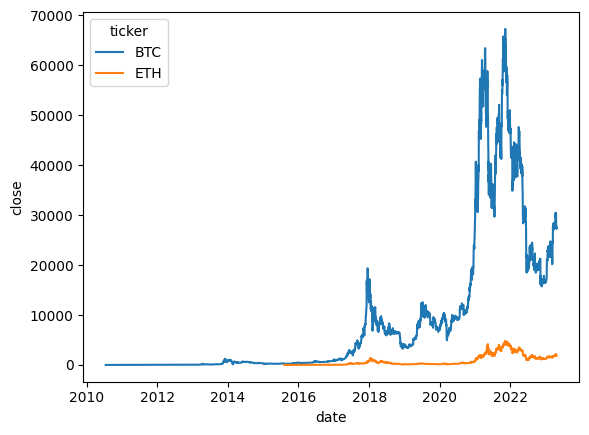

In [8]:
sb.lineplot(x='date',y='close', hue='ticker', data=btc_eth_concat)

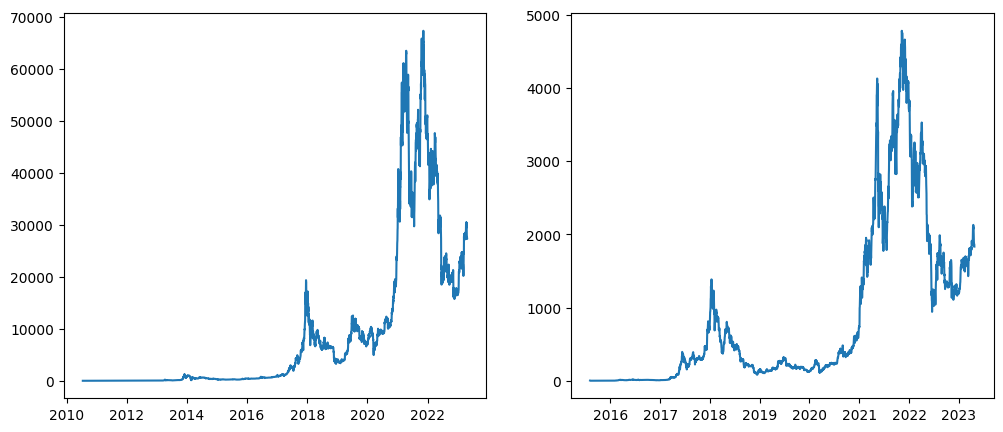

In [9]:
#Eth and Btc side-by-side
fig, axes = plt.subplots(1,2,figsize=(12,5))

axes[0].plot(btc_eth_concat.loc[btc_eth_concat['ticker'] == 'BTC', 'date'], btc_eth_concat.loc[btc_eth_concat['ticker'] == 'BTC', 'close'])
axes[1].plot(btc_eth_concat.loc[btc_eth_concat['ticker'] == 'ETH', 'date'], btc_eth_concat.loc[btc_eth_concat['ticker'] == 'ETH', 'close'])

In [10]:
btc_DF = btc_eth_concat[btc_eth_concat['ticker'] == 'BTC']
eth_DF = btc_eth_concat[btc_eth_concat['ticker'] == 'ETH']

print(btc_DF.head())
print(eth_DF.head())

        date ticker    close
0 2010-07-17    BTC  0.04951
1 2010-07-18    BTC  0.08584
2 2010-07-19    BTC  0.08080
3 2010-07-20    BTC  0.07474
4 2010-07-21    BTC  0.07921
        date ticker  close
0 2015-08-07    ETH   3.00
1 2015-08-08    ETH   1.20
2 2015-08-09    ETH   1.20
3 2015-08-10    ETH   1.20
4 2015-08-11    ETH   0.99


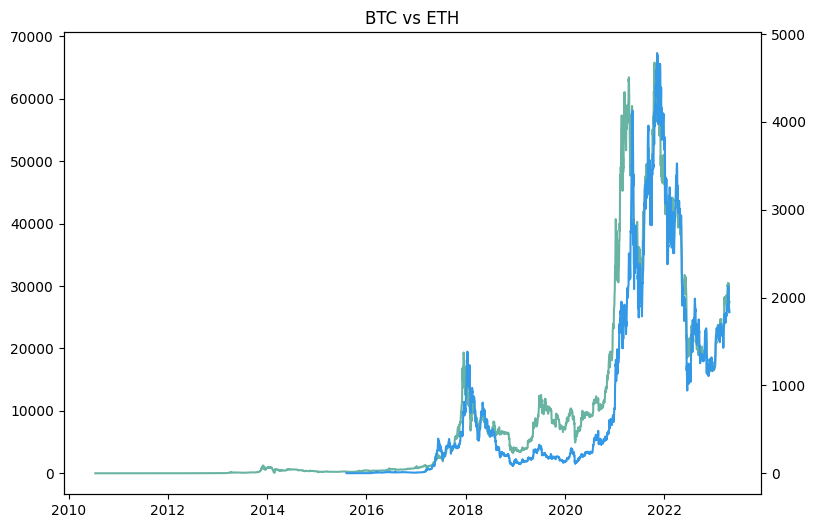

In [11]:
fig, ax1 = plt.subplots(figsize=(9,6))
ax1.set_title('BTC vs ETH')
ax2 = ax1.twinx()
COLOR_BTC = "#69b3a2"
COLOR_ETH = "#3399e6"
ax1.plot(btc_DF['date'], btc_DF['close'], color=COLOR_BTC)
ax2.plot(eth_DF['date'], eth_DF['close'], color=COLOR_ETH)

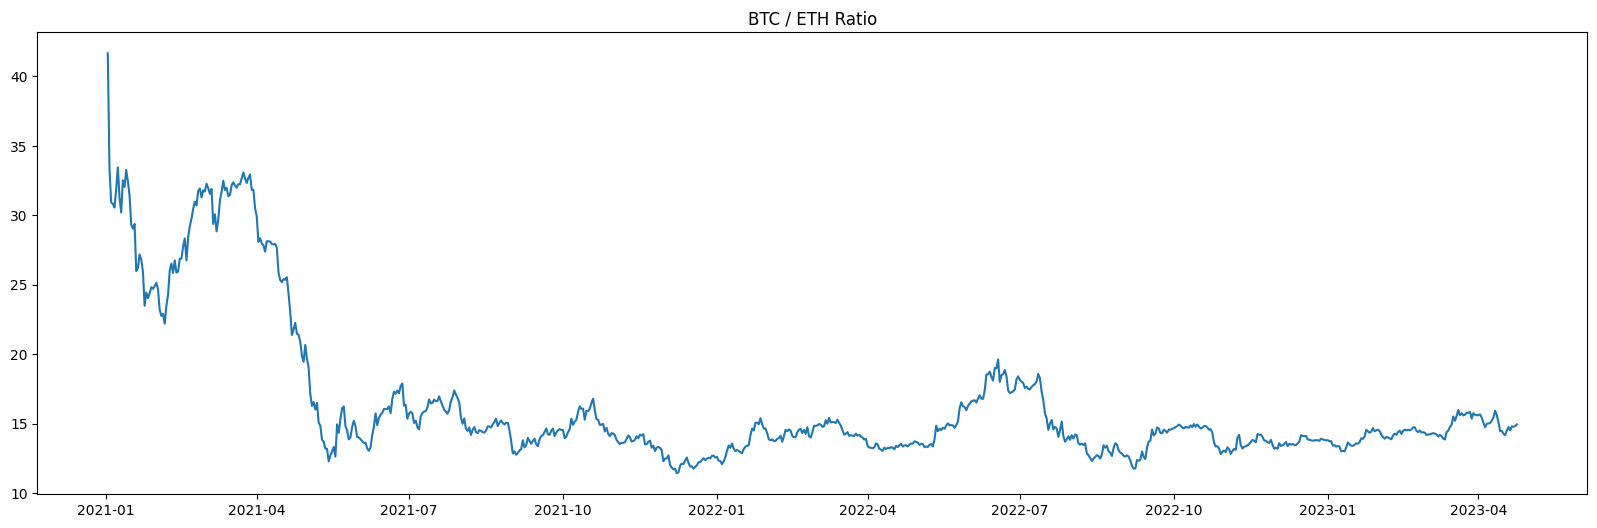

In [12]:
#btc to eth ratio over time
btc_eth_ratio = btc_eth
btc_eth_ratio['ratio'] = btc_eth_ratio['close_x'] / btc_eth_ratio['close_y']
btc_eth_ratio['date'] = pd.to_datetime(btc_eth_ratio['date'], format='%Y-%m-%d')
btc_eth_ratio_After_Year = btc_eth_ratio[btc_eth_ratio['date'] > pd.to_datetime('2021-01-01', format='%Y-%m-%d')]

fig, ax3 = plt.subplots(figsize=(20,6))
ax3.set_title('BTC / ETH Ratio')

ax3.plot(btc_eth_ratio_After_Year['date'],btc_eth_ratio_After_Year['ratio'])